In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import joblib

# Load Data and Eliminate the ethernet features

In [2]:
dnscat2_csv = pd.read_csv("dnscat2_features.csv")
dnsexfiltrator_csv = pd.read_csv("dnsexfiltrator_features.csv")

In [3]:
df_c2 = pd.DataFrame(dnscat2_csv)
df_exfil = pd.DataFrame(dnsexfiltrator_csv)

In [4]:
df_c2.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,10.0.2.23,10.0.2.22,58208,443,2023-10-26 14:02:17,33.513147,5536,165.188903,6834,203.919972,...,2.299151,35.990422,5.999202,1.255280,0.002635,0.000147,0.626406,0.209217,4.779173,True
1,10.0.2.23,10.0.2.22,56364,443,2023-10-26 14:02:21,30.019718,1366,45.503425,2919,97.236090,...,1.469559,0.001603,0.040040,0.018296,0.000360,0.000276,1.343904,0.450053,2.188440,True
2,10.0.2.23,10.0.2.22,36128,443,2023-10-23 21:25:15,523.894440,322475,615.534305,286017,545.943950,...,0.592067,0.000003,0.001617,0.002370,0.002276,0.002220,0.175285,0.093063,0.682089,True
3,10.0.2.23,10.0.2.22,35410,443,2023-10-26 18:25:45,465.830562,240236,515.715412,215791,463.239250,...,0.585995,0.000006,0.002444,0.002849,0.002580,0.002445,0.330464,0.165399,0.857687,True
4,10.0.2.23,10.0.2.22,56286,443,2023-10-24 10:03:05,705.887784,434806,615.970427,385345,545.901217,...,0.584099,0.000002,0.001428,0.002500,0.002412,0.002376,0.185373,0.086646,0.571365,True


In [5]:
#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','TimeStamp','DoH'],axis=1)

# below = test
df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMode', 'PacketLengthSkewFromMode', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation','TimeStamp','DoH'],axis=1)
df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMode', 'PacketLengthSkewFromMode', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation','TimeStamp','DoH'],axis=1)

#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','TimeStamp','DoH'],axis=1)

#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','TimeStamp','DoH'],axis=1)

#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian','TimeStamp','DoH'],axis=1)

#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian', 'ResponseTimeTimeMode','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian','ResponseTimeTimeMode','TimeStamp','DoH'],axis=1)

#df_c2 = df_c2.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian', 'ResponseTimeTimeMode','PacketLengthSkewFromMedian','TimeStamp','DoH'],axis=1)
#df_exfil = df_exfil.drop(['SourceIP','DestinationIP','SourcePort','DestinationPort','PacketLengthMedian','PacketLengthMode','PacketLengthMean','ResponseTimeTimeMedian','ResponseTimeTimeMode','PacketLengthSkewFromMedian','TimeStamp','DoH'],axis=1)


# Add Class Label to the data and Join the data

In [6]:
df_exfil['Class']= 0 # dnsexfiltrator
df_c2['Class']= 1 # dnscat2

In [7]:
#minimum = min(len(df_c2), len(df1_exfil))
#print(minimum)
#df_c2 = df_c2.head(minimum)
#df_exfil = df_exfil.head(minimum)

In [8]:
df_c2

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,Class
0,33.513147,5536,165.188903,6834,203.919972,41472.004082,203.646763,176.714286,167.5,0.135739,1.152407,69.971752,8.364912,3.638261,1.201436,33.511865,0.873945,-3.571299,2.299151,1
1,30.019718,1366,45.503425,2919,97.236090,138034.249307,371.529608,225.526316,74.0,1.223534,1.647389,194.505752,13.946532,9.490283,0.013570,30.018163,2.038510,-1.471899,1.469559,1
2,523.894440,322475,615.534305,286017,545.943950,5266.821921,72.572873,151.065541,168.0,-0.700033,0.480407,23356.456022,152.828191,258.126397,258.583112,0.000000,-0.008965,1.688997,0.592067,1
3,465.830562,240236,515.715412,215791,463.239250,5449.099818,73.818018,151.503987,168.0,-0.670406,0.487235,18244.949552,135.073867,230.503599,229.620026,0.000000,0.019624,1.706500,0.585995,1
4,705.887784,434806,615.970427,385345,545.901217,5228.891503,72.311075,151.487071,168.0,-0.685079,0.477342,41656.015182,204.098053,349.423848,347.051068,0.004951,0.034877,1.712015,0.584099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,1027.942954,982360,955.656144,855188,831.941108,4606.688046,67.872587,149.260661,167.0,-0.784087,0.454725,88167.162027,296.929557,512.506174,514.037676,0.000000,-0.015473,1.726019,0.579368,1
860,1033.622656,839528,812.219039,733783,709.913812,4115.728142,64.153941,147.770358,168.0,-0.945989,0.434146,89171.374930,298.615765,516.759903,515.711799,0.000000,0.010530,1.730518,0.577862,1
861,747.959759,475599,635.861748,421453,563.470153,5279.253020,72.658468,151.580264,168.0,-0.677956,0.479340,46551.754287,215.758556,372.597080,372.395236,0.000000,0.002807,1.726917,0.579067,1
862,600.290164,420864,701.100943,371714,619.223873,5236.317302,72.362403,151.168796,168.0,-0.697788,0.478686,29947.461531,173.053349,299.869297,300.839559,0.000000,-0.016820,1.732814,0.577096,1


In [9]:
df_exfil

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,Class
0,324.741605,213522,657.513533,189065,582.201347,13794.950094,117.451905,213.574005,285.0,-1.824389,0.549935,8769.442476,93.645301,160.277967,160.426372,0.0,-0.004754,1.711543,0.584268,0
1,17.252199,7692,445.856207,8100,469.505366,48651.312500,220.570425,246.750000,234.5,0.166613,0.893902,23.983759,4.897322,5.903528,5.094132,0.0,0.495820,1.205461,0.829558,0
2,1193.206790,536893,449.958050,491082,411.564872,28726.314122,169.488389,291.046149,401.0,-1.946219,0.582342,119241.836198,345.314112,592.765582,592.608281,0.0,0.001367,1.716598,0.582548,0
3,553.302413,233015,421.134979,213822,386.446896,25038.245658,158.234780,272.129720,372.0,-1.893458,0.581468,25763.225716,160.509270,272.924177,272.720191,0.0,0.003813,1.700364,0.588109,0
4,499.914188,440614,881.379266,391917,783.968548,27869.659703,166.942085,286.881806,396.0,-1.960887,0.581919,20784.911831,144.169733,247.939637,247.894269,0.0,0.000944,1.719776,0.581471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,1373.507275,576942,420.050196,521890,379.968865,13697.645140,117.036939,216.561293,286.0,-1.779918,0.540433,157533.805112,396.905285,683.711843,683.533519,0.0,0.001348,1.722607,0.580515,0
861,827.484412,491580,594.065571,442598,534.871707,24066.964876,155.135312,270.462652,370.0,-1.924849,0.573592,57179.988244,239.123375,411.024453,410.906438,0.0,0.001481,1.718880,0.581774,0
862,234.482250,113589,484.424727,103818,442.754196,21769.946161,147.546420,251.337572,341.0,-1.823069,0.587045,4578.201184,67.662406,114.966042,115.213564,0.0,-0.010975,1.699113,0.588543,0
863,165.121537,116215,703.814912,103719,628.137322,17815.509274,133.474751,231.753425,314.0,-1.848587,0.575934,2223.783506,47.157009,81.196593,81.368418,0.0,-0.010931,1.721835,0.580776,0


In [10]:
frame = [df_exfil,df_c2]
df_binary = pd.concat(frame)

In [11]:
df_binary

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,Class
0,324.741605,213522,657.513533,189065,582.201347,13794.950094,117.451905,213.574005,285.0,-1.824389,0.549935,8769.442476,93.645301,160.277967,160.426372,0.0,-0.004754,1.711543,0.584268,0
1,17.252199,7692,445.856207,8100,469.505366,48651.312500,220.570425,246.750000,234.5,0.166613,0.893902,23.983759,4.897322,5.903528,5.094132,0.0,0.495820,1.205461,0.829558,0
2,1193.206790,536893,449.958050,491082,411.564872,28726.314122,169.488389,291.046149,401.0,-1.946219,0.582342,119241.836198,345.314112,592.765582,592.608281,0.0,0.001367,1.716598,0.582548,0
3,553.302413,233015,421.134979,213822,386.446896,25038.245658,158.234780,272.129720,372.0,-1.893458,0.581468,25763.225716,160.509270,272.924177,272.720191,0.0,0.003813,1.700364,0.588109,0
4,499.914188,440614,881.379266,391917,783.968548,27869.659703,166.942085,286.881806,396.0,-1.960887,0.581919,20784.911831,144.169733,247.939637,247.894269,0.0,0.000944,1.719776,0.581471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,1027.942954,982360,955.656144,855188,831.941108,4606.688046,67.872587,149.260661,167.0,-0.784087,0.454725,88167.162027,296.929557,512.506174,514.037676,0.0,-0.015473,1.726019,0.579368,1
860,1033.622656,839528,812.219039,733783,709.913812,4115.728142,64.153941,147.770358,168.0,-0.945989,0.434146,89171.374930,298.615765,516.759903,515.711799,0.0,0.010530,1.730518,0.577862,1
861,747.959759,475599,635.861748,421453,563.470153,5279.253020,72.658468,151.580264,168.0,-0.677956,0.479340,46551.754287,215.758556,372.597080,372.395236,0.0,0.002807,1.726917,0.579067,1
862,600.290164,420864,701.100943,371714,619.223873,5236.317302,72.362403,151.168796,168.0,-0.697788,0.478686,29947.461531,173.053349,299.869297,300.839559,0.0,-0.016820,1.732814,0.577096,1


In [12]:
df_binary = df_binary.reset_index(drop=True) #reset and create a new index

In [13]:
df_binary

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,Class
0,324.741605,213522,657.513533,189065,582.201347,13794.950094,117.451905,213.574005,285.0,-1.824389,0.549935,8769.442476,93.645301,160.277967,160.426372,0.0,-0.004754,1.711543,0.584268,0
1,17.252199,7692,445.856207,8100,469.505366,48651.312500,220.570425,246.750000,234.5,0.166613,0.893902,23.983759,4.897322,5.903528,5.094132,0.0,0.495820,1.205461,0.829558,0
2,1193.206790,536893,449.958050,491082,411.564872,28726.314122,169.488389,291.046149,401.0,-1.946219,0.582342,119241.836198,345.314112,592.765582,592.608281,0.0,0.001367,1.716598,0.582548,0
3,553.302413,233015,421.134979,213822,386.446896,25038.245658,158.234780,272.129720,372.0,-1.893458,0.581468,25763.225716,160.509270,272.924177,272.720191,0.0,0.003813,1.700364,0.588109,0
4,499.914188,440614,881.379266,391917,783.968548,27869.659703,166.942085,286.881806,396.0,-1.960887,0.581919,20784.911831,144.169733,247.939637,247.894269,0.0,0.000944,1.719776,0.581471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,1027.942954,982360,955.656144,855188,831.941108,4606.688046,67.872587,149.260661,167.0,-0.784087,0.454725,88167.162027,296.929557,512.506174,514.037676,0.0,-0.015473,1.726019,0.579368,1
1725,1033.622656,839528,812.219039,733783,709.913812,4115.728142,64.153941,147.770358,168.0,-0.945989,0.434146,89171.374930,298.615765,516.759903,515.711799,0.0,0.010530,1.730518,0.577862,1
1726,747.959759,475599,635.861748,421453,563.470153,5279.253020,72.658468,151.580264,168.0,-0.677956,0.479340,46551.754287,215.758556,372.597080,372.395236,0.0,0.002807,1.726917,0.579067,1
1727,600.290164,420864,701.100943,371714,619.223873,5236.317302,72.362403,151.168796,168.0,-0.697788,0.478686,29947.461531,173.053349,299.869297,300.839559,0.0,-0.016820,1.732814,0.577096,1


In [14]:
df_binary.columns[7]

'PacketLengthMean'

# Split the data and Normalize 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Split the dataset in 80:20
X_train, X_test, y_train, y_test = train_test_split(df_binary[[col for col in df_binary.columns if col != "Class"]], 
                                                    df_binary["Class"], test_size=0.2)
X_train.shape, X_test.shape

((1383, 19), (346, 19))

In [16]:
y_train.shape, y_test.shape

((1383,), (346,))

In [17]:
X_train

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthSkewFromMedian,PacketLengthCoefficientofVariation,PacketTimeVariance,PacketTimeStandardDeviation,PacketTimeMean,PacketTimeMedian,PacketTimeMode,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation
615,2285.158332,792640,346.864368,722285,316.076567,11068.058649,105.204841,200.122193,259.0,-1.678948,0.525703,436083.373275,660.366090,1139.114336,1138.946320,0.000000,0.000763,1.724974,0.579719
1071,751.234768,620508,825.984135,543003,722.813990,5345.643970,73.113911,151.874559,168.0,-0.661657,0.481410,47630.103185,218.243220,373.557148,370.555934,0.000000,0.041255,1.711655,0.584230
1263,505.077800,250542,496.046352,225719,446.899468,6714.902728,81.944510,156.151148,168.0,-0.433788,0.524777,22236.784352,149.120033,247.692798,245.497408,0.005355,0.044167,1.660994,0.602036
408,614.807098,287314,467.323817,262081,426.281676,24704.703190,157.177299,271.574394,371.0,-1.897709,0.578763,31713.896528,178.083959,303.975984,304.251454,0.000000,-0.004641,1.706925,0.585849
1463,1014.573774,516938,509.512480,463311,456.655802,5742.950204,75.782255,153.933574,168.0,-0.556849,0.492305,87852.733627,296.399618,500.198850,497.410568,0.000000,0.028222,1.687583,0.592564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,488.958458,318296,650.967367,282061,576.860867,5909.871664,76.875690,153.269594,168.0,-0.574840,0.501572,20034.242699,141.542371,240.539747,238.506852,0.000000,0.043087,1.699419,0.588437
1473,752.698673,467223,620.730469,414632,550.860543,5436.869097,73.735128,152.227689,167.0,-0.601029,0.484374,47403.759975,217.724045,372.511201,372.597073,0.000000,-0.001183,1.710933,0.584477
11,81.223144,41297,508.438826,38114,469.250489,21168.721944,145.494749,231.518950,313.0,-1.680082,0.628436,557.539960,23.612284,37.945080,38.070558,0.000000,-0.015942,1.607006,0.622275
853,79.760092,54792,686.960090,49869,625.237493,27360.419033,165.409852,265.637056,368.5,-1.865601,0.622691,530.562402,23.033940,37.561896,37.404987,0.000000,0.020436,1.630720,0.613226


In [18]:
y_train

615     0
1071    1
1263    1
408     0
1463    1
       ..
1247    1
1473    1
11      0
853     0
370     0
Name: Class, Length: 1383, dtype: int64

In [19]:
count_values = y_test.value_counts()
print(count_values)
# 0: dnsexfiltrator
# 1: dnscat2

0    174
1    172
Name: Class, dtype: int64


In [20]:
from sklearn import preprocessing

x = X_train.values # transform data in numpy array
xtest = X_test.values

min_max_scaler = preprocessing.MinMaxScaler() #create an object to normalize between 0 and 1 by default

#Sources: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
#         https://www.digitalocean.com/community/tutorials/normalize-data-in-python
#         https://medium.com/@spinjosovsky/normalize-data-before-or-after-split-of-training-and-testing-data-7b8005f81e26
x_scaled = min_max_scaler.fit_transform(x)
xtest_scaled = min_max_scaler.transform(xtest)

joblib.dump(min_max_scaler, './min_max_scaler.joblib')

X_train_new = pd.DataFrame(x_scaled) #reconversion in dataframe
X_test_new = pd.DataFrame(xtest_scaled)

In [21]:
X_train_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.931509,0.721691,0.311506,0.756469,0.275358,0.053965,0.139997,0.383603,0.565749,0.094018,0.085084,0.868178,0.931468,0.931681,0.931505,0.000000,0.090297,0.992175,0.007908
1,0.303068,0.564696,0.806755,0.567940,0.787138,0.011327,0.036370,0.056520,0.287462,0.411556,0.048956,0.094808,0.304955,0.303526,0.303058,0.000000,0.108373,0.989680,0.010511
2,0.202219,0.227264,0.465710,0.234291,0.439967,0.021529,0.064886,0.085512,0.287462,0.482683,0.084328,0.044253,0.207004,0.200252,0.200775,0.000004,0.109673,0.980189,0.020785
3,0.247174,0.260802,0.436021,0.272529,0.414024,0.155572,0.307824,0.867996,0.908257,0.025734,0.128363,0.063121,0.248047,0.246433,0.248829,0.000000,0.087884,0.988794,0.011445
4,0.410957,0.470233,0.479630,0.484137,0.452243,0.014287,0.044987,0.070479,0.287462,0.444270,0.057842,0.174887,0.415707,0.407438,0.406809,0.000000,0.102555,0.985170,0.015320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.195615,0.289060,0.625846,0.293539,0.603492,0.015531,0.048518,0.065977,0.287462,0.438655,0.065401,0.039868,0.196266,0.194382,0.195058,0.000000,0.109191,0.987387,0.012938
1379,0.303668,0.424890,0.594592,0.432948,0.570777,0.012006,0.038376,0.058914,0.284404,0.430480,0.051373,0.094358,0.304219,0.302668,0.304727,0.000000,0.089428,0.989544,0.010654
1380,0.028568,0.036420,0.478520,0.037010,0.468090,0.129226,0.270099,0.596450,0.730887,0.093664,0.168879,0.001092,0.029152,0.028149,0.031126,0.000000,0.082839,0.970075,0.032463
1381,0.027968,0.048728,0.663051,0.049372,0.664362,0.175360,0.334408,0.827745,0.900612,0.035756,0.164193,0.001038,0.028333,0.027835,0.030582,0.000000,0.099079,0.974518,0.027242


In [22]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.title("Confusion Matrix")
    #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Exfiltration", "C&C"], yticklabels=["Exfiltration", "C&C"])
    
    #labels = ["C&C", "Exfiltration"]
    #plt.xticks(ticks=[0.5, 1.5], labels=labels)
    #plt.yticks(ticks=[0.5, 1.5], labels=labels)
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()

# Logistic Regression

In [23]:
model_filename_logistic = './logistic_regression_model.joblib'

In [24]:
#Source: https://medium.com/@draj0718/logistic-regression-with-standardscaler-from-the-scratch-ec01def674e8
import time
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score

logistic_model = LogisticRegression(solver = 'liblinear') #Setting the random_state for reproducibility in classification.
logistic_model.fit(X_train_new, y_train)

joblib.dump(logistic_model, model_filename_logistic)

['./logistic_regression_model.joblib']

In [25]:
logistic_model = joblib.load(model_filename_logistic)

y_pred = logistic_model.predict(X_test_new)

#y_prob = logistic_model.predict_proba(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)

In [26]:
class_report

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 174},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 172},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 346},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 346}}

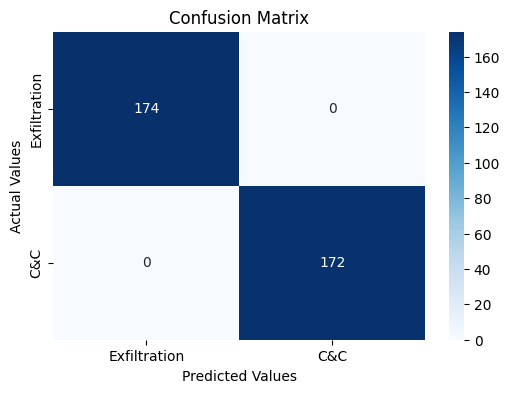

In [27]:
plot_confusion_matrix(y_test, y_pred)

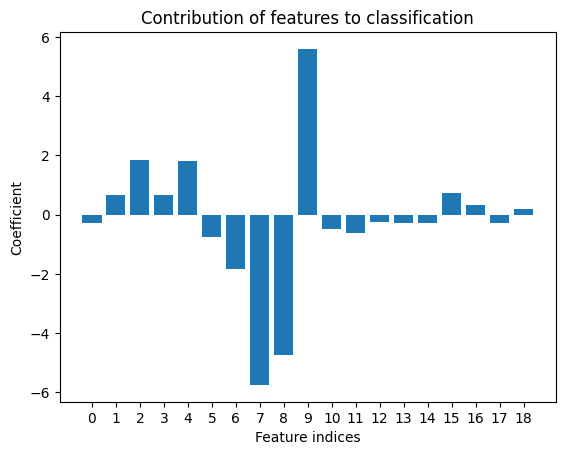

In [28]:
coefficients = logistic_model.coef_

df = df_binary.iloc[:,:-1]

feature_coefficients = dict(zip(df.columns, coefficients[0]))

import matplotlib.pyplot as plt

#print(len(df.columns.tolist()))
#print(len(coefficients[0]))

plt.bar(range(len(df.columns)), coefficients[0])
plt.xlabel("Feature indices")
plt.ylabel("Coefficient")
plt.title("Contribution of features to classification")
plt.xticks(range(len(df.columns)), range(len(df.columns)))  # Facultatif : pour afficher les indices sur l'axe x
plt.show()

In [29]:
print(df.columns[7] + ' ' + str(feature_coefficients['PacketLengthMean']))
print(df.columns[8] + ' ' + str(feature_coefficients['PacketLengthMedian']))
print(df.columns[9] + ' ' + str(feature_coefficients['PacketLengthSkewFromMedian']))

PacketLengthMean -5.746236357626092
PacketLengthMedian -4.74800519597109
PacketLengthSkewFromMedian 5.5940846104771556


In [30]:
'''
import sklearn.metrics as metrics

y_pred = logistic_model.predict_proba(X_test_new)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
'''

'\nimport sklearn.metrics as metrics\n\ny_pred = logistic_model.predict_proba(X_test_new)[::,1]\nfpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)\nauc = metrics.roc_auc_score(y_test, y_pred)\nplt.plot(fpr,tpr,label="data 1, auc="+str(auc))\nplt.legend(loc=4)\nplt.show()\n'

# SVM

In [31]:
model_filename_svm = './svm_model.joblib'

In [32]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train_new, y_train)

joblib.dump(svm_model, model_filename_svm)

['./svm_model.joblib']

In [33]:
svm_model = joblib.load(model_filename_svm)
y_pred = svm_model.predict(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)

In [34]:
class_report

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 174},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 172},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 346},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 346}}

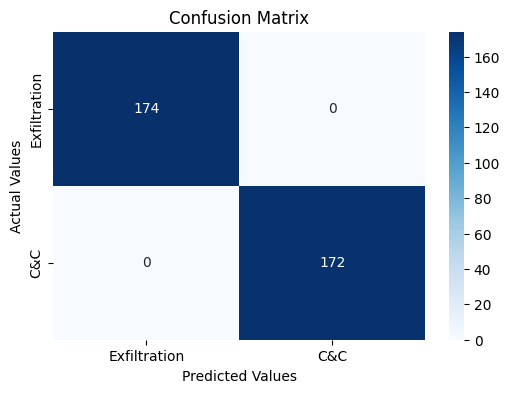

In [35]:
plot_confusion_matrix(y_test, y_pred)

# Naive Bayes

In [36]:
model_filename_nb = './naive_bayes_model.joblib'

In [37]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_new, y_train)

joblib.dump(naive_bayes_model, model_filename_nb)

['./naive_bayes_model.joblib']

In [38]:
naive_bayes_model = joblib.load(model_filename_nb)

y_pred = naive_bayes_model.predict(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)

In [39]:
class_report

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 174},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 172},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 346},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 346}}

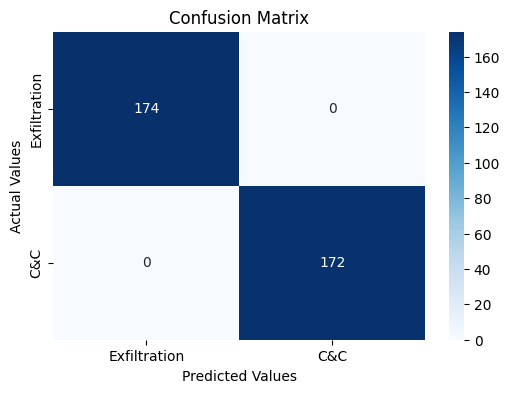

In [40]:
plot_confusion_matrix(y_test, y_pred)

# Decision Tree

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [42]:
model_filename_tree = './decision_tree_model.joblib'

In [43]:
tree_model = DecisionTreeClassifier(criterion="gini")
tree_model.fit(X_train_new, y_train)

joblib.dump(tree_model, model_filename_tree)

['./decision_tree_model.joblib']

In [44]:
tree_model = joblib.load(model_filename_tree)

In [45]:
'''import utils
utils.DT_to_PNG(clf, lbc.feature_names, "Tree_task1")
clf.plot_tree(tree1)
plt.show()
'''
from sklearn import tree
text_representation = tree.export_text(tree_model)
print(text_representation)

|--- feature_8 <= 0.39
|   |--- class: 1
|--- feature_8 >  0.39
|   |--- class: 0



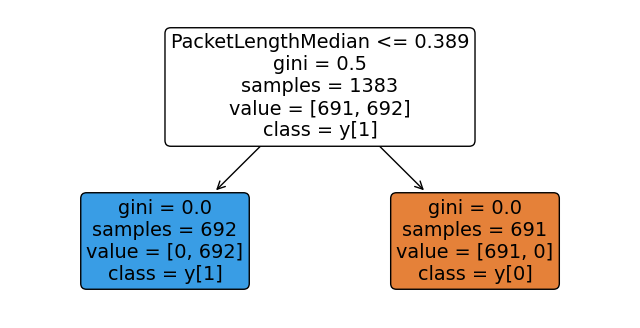

In [46]:
# Affichage de l'arbre de décision
plt.figure(figsize=(8,4))
plot_tree(tree_model, filled=True, feature_names=df.columns, class_names=True, rounded=True)
plt.show()

In [47]:
y_pred = tree_model.predict(X_test_new)

# save classification report and metrics
class_report = classification_report(y_test, y_pred, output_dict=True)

In [48]:
class_report

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 174},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 172},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 346},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 346}}

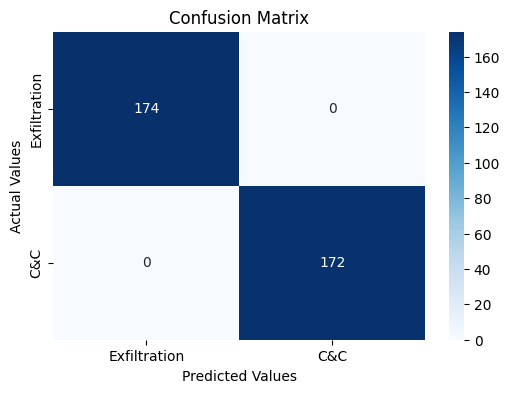

In [49]:
plot_confusion_matrix(y_test, y_pred)